<h1>1. Problem Definition </h1>

Determining whether water is safe for consumption is crucial but often requires laboratory testing, which can be time-consuming and costly. The goal of this project is to use machine learning algorithms to predict whether a given water sample is potable (safe to drink) based on features such as pH, hardness, conductivity, and chemical composition. This will provide an automated and efficient method for water quality assessment.


**Objectives**:

* Understand the distribution of water quality parameters.

* Identify correlations between features.

* Determine key factors influencing water potability.

* Provide insights through visualizations to support findings.


<h1>2. Literature Review</h1>

Water quality assessment has been widely studied using chemical and physical parameters. Research highlights the significance of parameters such as:

* pH: Affects solubility and biological processes. Safe drinking water typically falls within 6.5-8.5.

* Hardness: Related to dissolved calcium and magnesium, affecting taste and scaling in pipes.

* TDS (Total Dissolved Solids): Higher TDS levels indicate increased minerals or pollutants.

* Chloramines: Used for disinfection but can lead to harmful byproducts.

* THMs (Trihalomethanes): Disinfection byproducts linked to health risks.

* Conductivity: Reflects ion concentration, often related to TDS.

<h1> Import Library </h1>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("water_potability.csv")

<h1> Data Cleaning </h1>

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
# df = df[df["Trihalomethanes"] > 0]

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
# df.describe()

In [ ]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


Missing Values:

* ph has 491 missing values.

* Sulfate has 781 missing values.

* Trihalomethanes has 162 missing values.



In [ ]:
df = df.copy(deep=True)  # Ensure df is a new copy
df.fillna({"ph": df["ph"].mean(),
           "Sulfate": df["Sulfate"].mean(),
           "Trihalomethanes": df["Trihalomethanes"].mean()}, inplace=True)

df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


The missing values in the **ph, Sulfate, and Trihalomethanes** columns were replaced with their respective mean values to maintain data consistency and prevent information loss.

Returns the number of missing values per column, ensuring that no missing values remain in ph, Sulfate, and Trihalomethanes.

In [ ]:
df.duplicated().sum()

0

There are no duplicate value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


<h1> Data Visualization </h1>

In [ ]:

d = pd.DataFrame(df["Potability"].value_counts()).reset_index()
d.columns = ['Potability', 'Count']  # Rename columns for clarity
d["Potability"] = ["Potable" if i == 1 else "not potable" for i in d["Potability"]]

fig = px.pie(d, values='Count', names='Potability', hole=0.35, opacity=0.8,
             title="Pie Chart of Potability Feature")

fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

The pie chart clearly visualizes the distribution of water potability.  A significant portion, **61%**, is marked as not potable (represented by a value of 0 in the dataset), while the remaining **39%** is considered potable (value of 1).  It's worth noting that the "not potable" category represents 1998 counts, and the "potable" category represents 1278 counts.  The donut hole provides a clean space within the chart, and displaying both percentages and labels directly on the pie slices makes the information easily digestible.  The title "Pie Chart of Potability Feature" is also clear and concise.

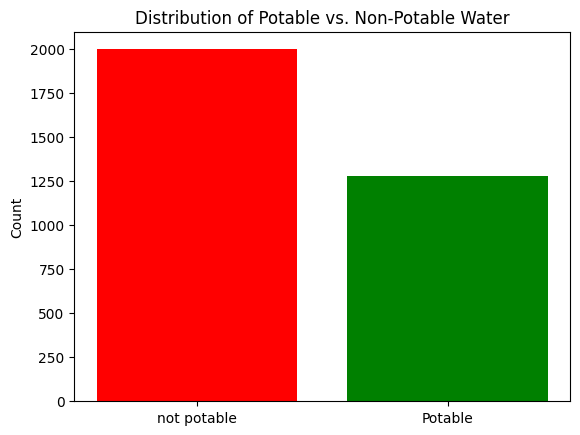

In [ ]:
plt.bar(d["Potability"], d["Count"], color=['red', 'green'])


plt.ylabel("Count")
plt.title("Distribution of Potable vs. Non-Potable Water")

plt.show()

The visual representation clearly shows a higher count of non-potable water (**2000**) compared to potable water (**1250**). The use of distinct colors (red for non-potable and green for potable) further enhances the clarity and makes the comparison straightforward.  Labeling the y-axis as "Count" and providing the title "Distribution of Potable vs. Non-Potable Water" makes the chart easy to understand at a glance.

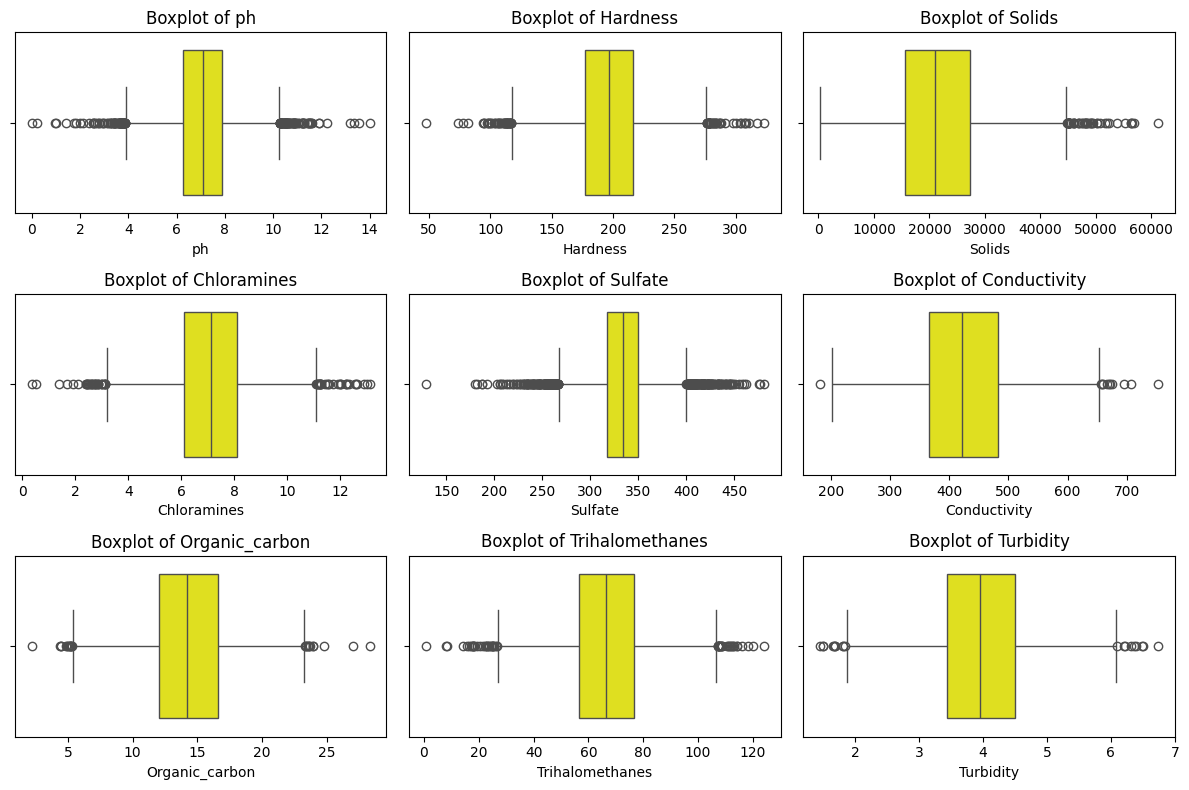

In [ ]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color="yellow")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

Boxplots are used to show the median, quartiles, and potential outliers of each feature.

By examining the boxplots, you can quickly identify features with skewed distributions, outliers, or significant differences in their ranges.

In [ ]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1  # Interquartile range

# # Define lower and upper bounds for outlier detection
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Remove outliers by keeping only values within the bounds
# df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [ ]:
# # Set plot size
# plt.figure(figsize=(12, 8))

# # Create boxplots for each feature
# for i, col in enumerate(df.columns[:-1], 1):  # Exclude 'Potability'
#     plt.subplot(3, 3, i)
#     sns.boxplot(x=df_cleaned[col], color="lightblue")  # Set a fixed color instead of palette
#     plt.title(f"Boxplot of {col}")

# plt.tight_layout()
# plt.show()

In [ ]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


The code df.corr() calculates the Pearson correlation coefficients between all pairs of numerical columns in the DataFrame df.  The resulting table shows the strength and direction of linear relationships.

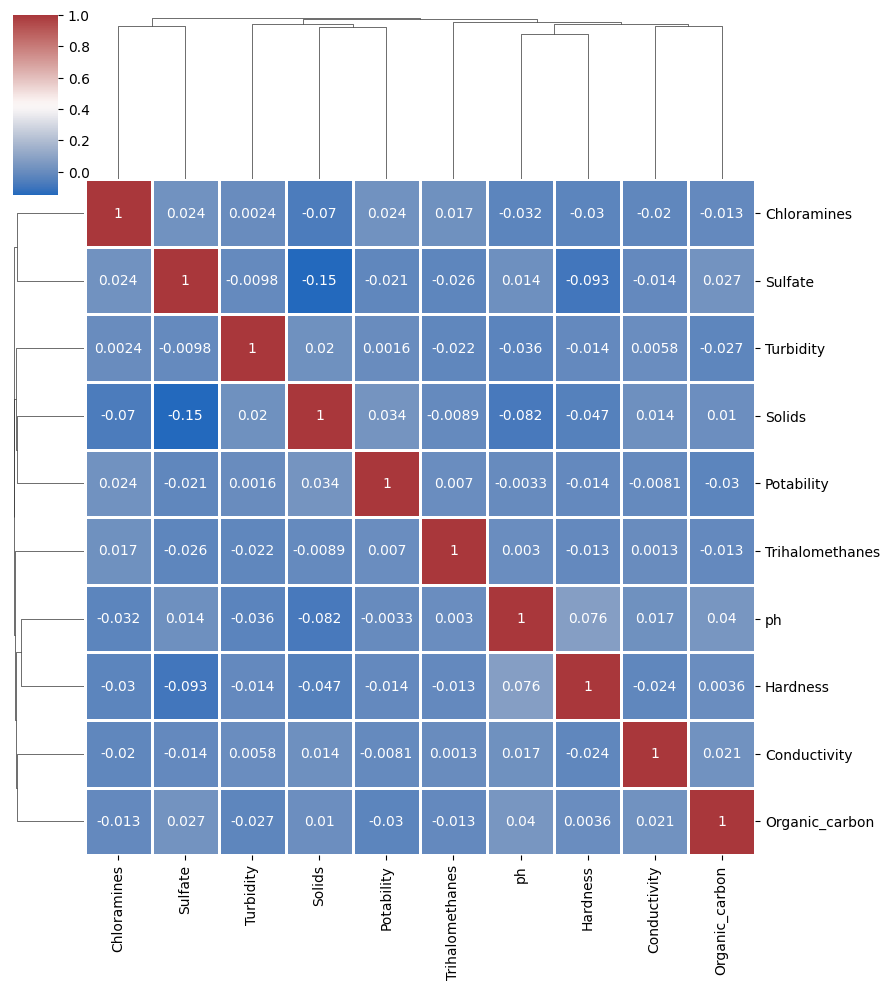

In [ ]:
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

**Strong Positive Correlation:** There appears to be a strong positive correlation between "Chloramines" and "Sulfate" (the deep red square).

**Moderate Negative Correlation:** "Solids" seems to have a moderate negative correlation with "Sulfate" (the bluish square).

**Weak Correlations:** Most other correlations appear to be weak (close to zero), as evidenced by the lighter colors. This suggests that linear relationships between many of these variables are not very strong.

**Potability Correlation:** The "Potability" row shows mostly weak correlations with other variables. This implies that these features, individually, might not be strong predictors of potability.


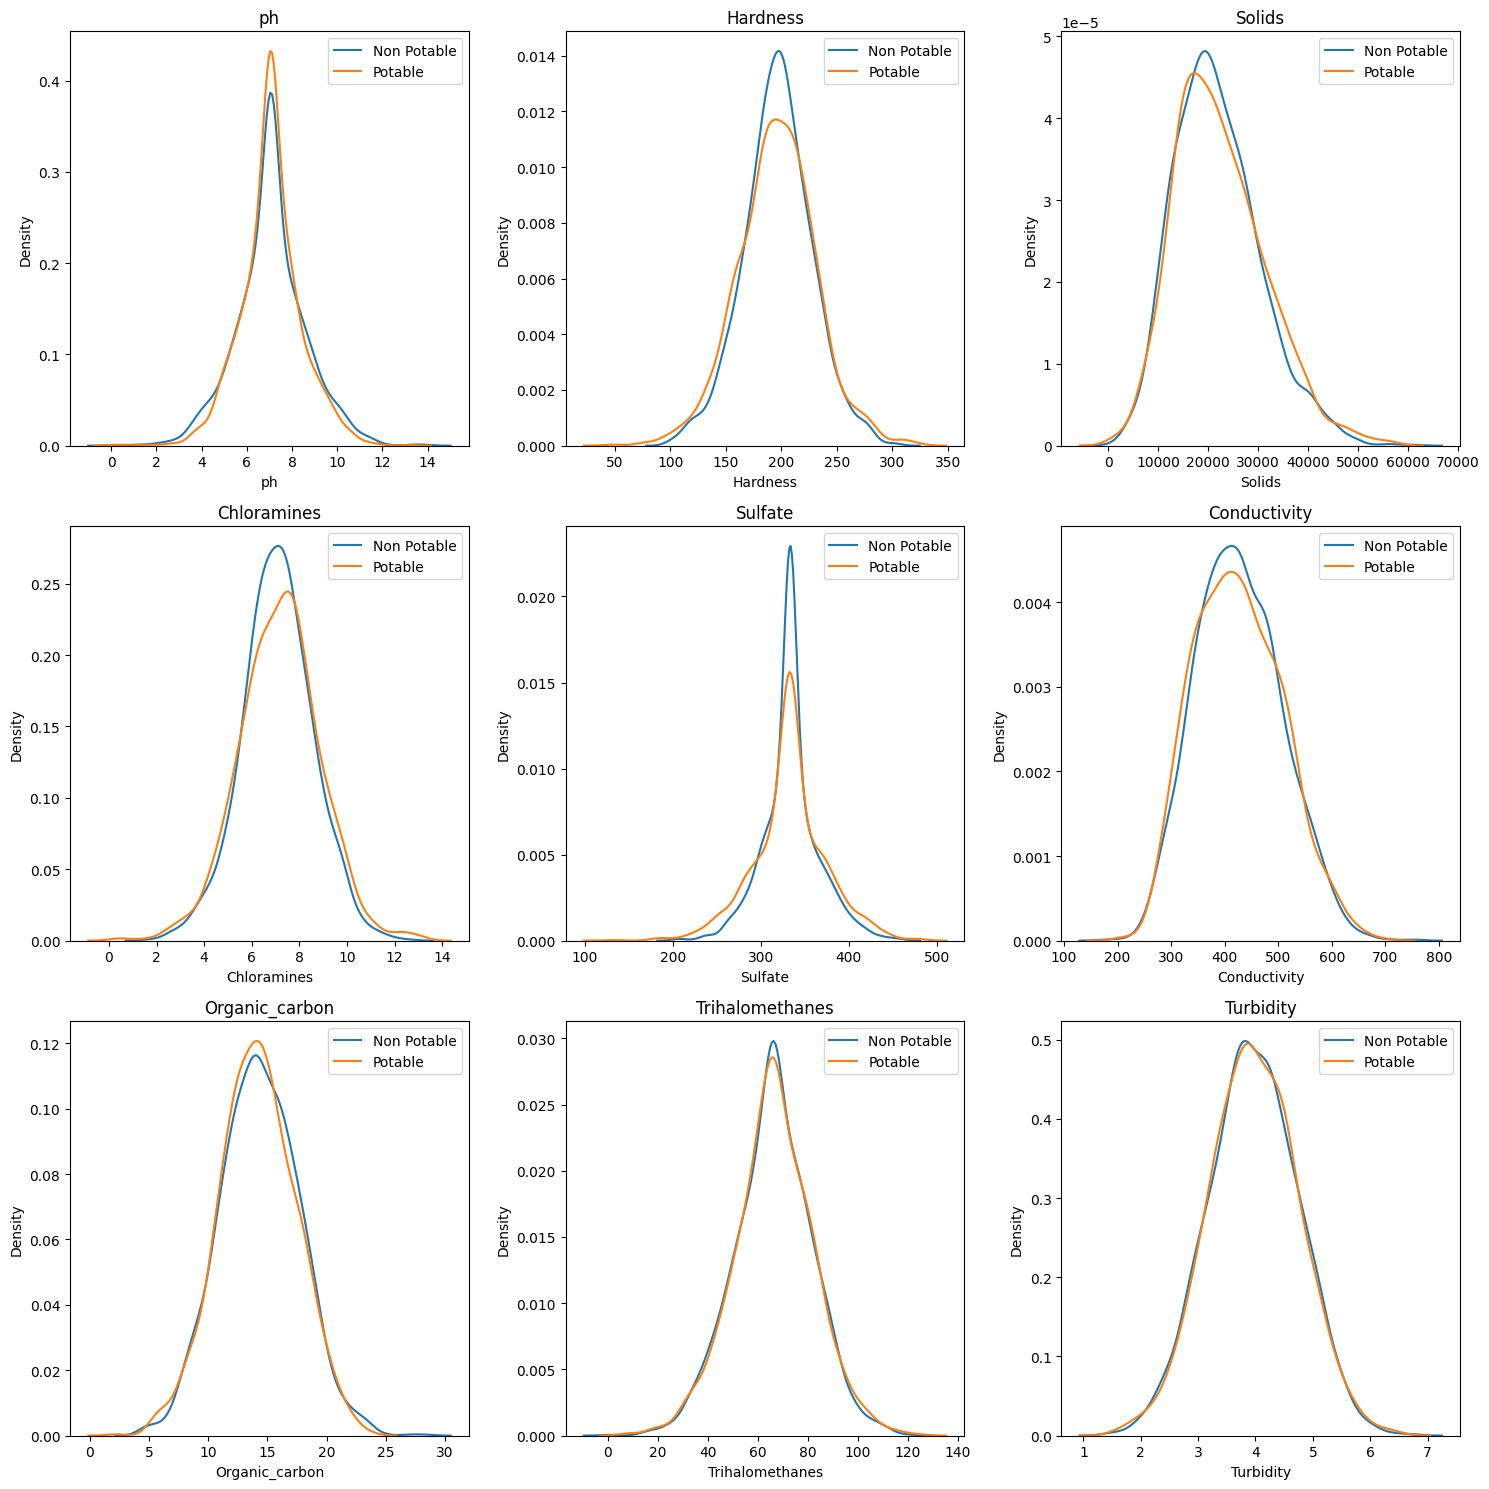

In [ ]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.tight_layout()

This Kernel Density Estimation (KDE) plot allows for a visual comparison of the distributions of each feature between potable and non-potable water.

It can help identify features that might be important for predicting potability.

X-axis: Represents the range of values for the feature.

Y-axis: Represents the density. Higher density indicates a higher concentration of data points around that value.

If the two curves are well-separated, it suggests that the feature might be a good discriminator between potable and non-potable water.

If the curves overlap significantly, it suggests that the feature might not be very useful for distinguishing between the two categories.

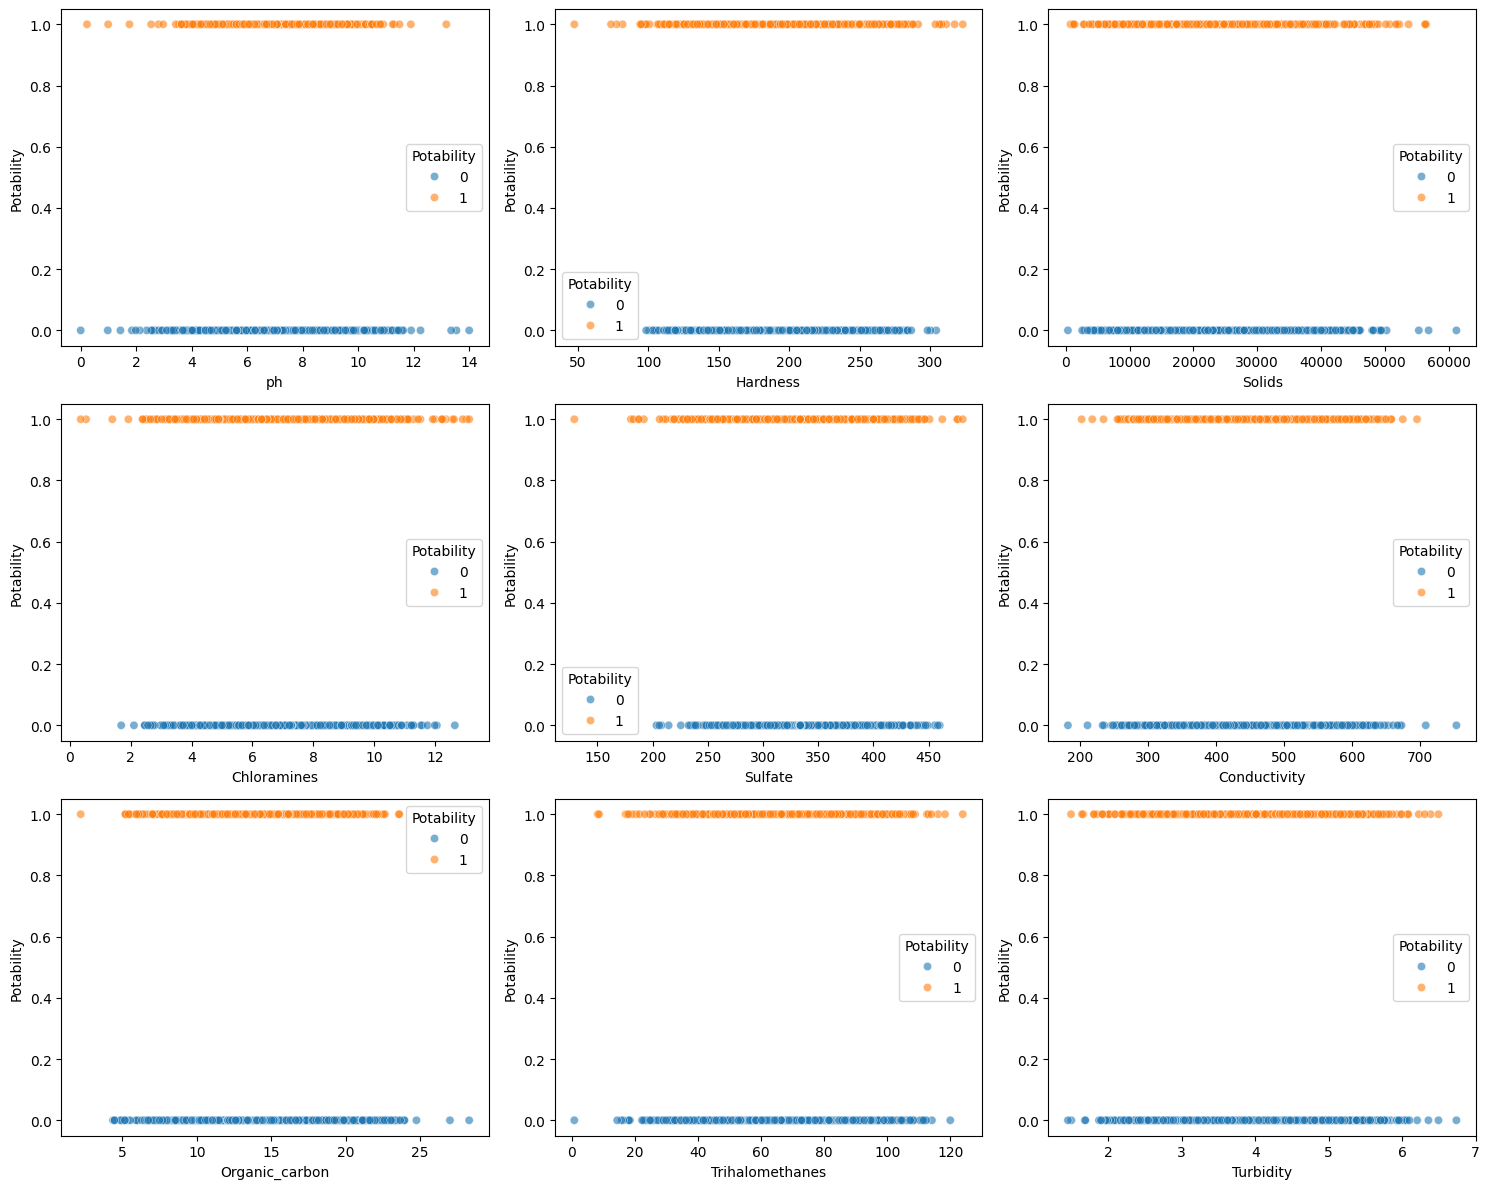

In [ ]:
features = df.columns[:-1]  # Exclude 'Potability'
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Ensure we don't index out of bounds
for i in range(len(features)):
    sns.scatterplot(
        x=df[features[i]],
        y=df["Potability"],
        hue=df["Potability"],
        alpha=0.6,
        ax=axes[i]
    )
    axes[i].set_xlabel(features[i])
    axes[i].set_ylabel("Potability")
    axes[i].legend(title="Potability")

# Hide any unused subplots if they exist
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

This scatter plots visualize the relationship between each numerical feature in the dataset.

Binary Target Variable: The y-axis (probability) represents water potability, which is binary (0 or 1). Each feature is plotted against this classification.

Identify potential patterns or trends between features and potability.

Observe if certain features have a clear separation between potable and non-potable samples.

Get a visual understanding of the distribution of data points for each feature with respect to potability.

<h1> Feature Engineering </h1>


In [ ]:
df['High_Sulfate'] = (df['Sulfate'] > 400).astype(int)
df['High_Organic_Carbon'] = (df['Organic_carbon'] > 20).astype(int)
df['Cloudy_Water'] = (df['Turbidity'] > 4).astype(int)
df


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,High_Sulfate,High_Organic_Carbon,Cloudy_Water
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,0,0,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0,0,0,1
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0,0,0,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,0,0,1
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1,0,0,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1,0,0,0
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1,0,0,0
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1,0,0,1


In [ ]:
# count_of_ones = df['High_Organic_Carbon'].value_counts().get(1, 0)
# count_of_ones

In [ ]:
# scaler = StandardScaler()
# df[['Conductivity', 'Hardness']] = scaler.fit_transform(df[['Conductivity', 'Hardness']])
# df

In [ ]:
df.loc[:,"Hardness"] = np.log(df["Hardness"])
df.loc[:,"Conductivity"] = np.log(df["Conductivity"])
df.loc[:,"Solids"] = np.log(df["Solids"])
df.loc[:,"Sulfate"] = np.log(df["Sulfate"])
df.loc[:,"Trihalomethanes"] = np.log(df["Trihalomethanes"])
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,High_Sulfate,High_Organic_Carbon,Cloudy_Water
0,7.080795,5.322475,9.942291,7.300212,5.909485,6.335601,10.379783,4.465804,2.963135,0,0,0,0
1,3.716080,4.863085,9.832532,6.635246,5.810469,6.385001,15.180013,4.031211,4.500656,0,0,0,1
2,8.099124,5.412700,9.898954,9.275884,5.810469,6.036931,16.868637,4.196000,3.055934,0,0,0,0
3,8.316766,5.367719,9.999635,8.059332,5.877417,5.895137,18.436524,4.608581,4.628771,0,0,0,1
4,9.092223,5.199058,9.796959,6.546600,5.737010,5.987484,11.558279,3.465673,4.075075,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,5.266216,10.770189,7.166639,5.885961,6.266107,13.894419,4.200020,4.435821,1,0,0,1
3272,7.808856,5.265552,9.760183,8.061362,5.810469,5.972408,19.903225,4.195641,2.798243,1,0,0,0
3273,9.419510,5.169134,10.408966,7.350233,5.810469,6.068529,11.039070,4.246284,3.298875,1,0,0,0
3274,5.126763,5.440701,9.391317,6.303357,5.810469,5.998646,11.168946,4.350126,4.708658,1,0,0,1


<h1>Building Model </h1>


In [ ]:
df.columns


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability',
       'High_Sulfate', 'High_Organic_Carbon', 'Cloudy_Water'],
      dtype='object')

In [ ]:
X = df.drop('Potability', axis=1)
y = df['Potability']

X.shape, y.shape

((3276, 12), (3276,))

This code separates your data into features (X) and the target variable (y).  This is a fundamental step in supervised machine learning because we need to train the model on the features and their corresponding true labels to learn the relationship between them.

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# X = scaler.fit_transform(X)
# X

StandardScaler helps to reduce a kind of algorithmic bias caused by features having different scales. This is particularly important for distance-based algorithms, regularization, and gradient descent-based optimization. It makes sure that all features contribute more equally to the model's learning process.

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (2293, 12)
X_test (983, 12)
y_train (2293,)
y_test (983,)


The primary reason for this split is to evaluate the performance of a machine learning model on unseen data.

This code splits the data into training (70%) and testing (30%) sets.

X is the feature matrix (the independent variables).

y is the target variable (the dependent variable or labels).

<h1> Logistic Regression

In [ ]:
model_LR = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)
model_LR

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

This code prepares a Logistic Regression model for training. The parameters are set to control the training process and ensure reproducibility.

In [ ]:
model_LR.fit(X_train,y_train)
model_LR

LogisticRegression(max_iter=120, n_jobs=20, random_state=0)

This code demonstrates the training of a Logistic Regression model and the display of its initialized parameters.

In [ ]:
y_pred = model_LR.predict(X_test)

The y_pred variable now contains the model's predictions for the potability of the water samples in the test set.

In [ ]:
LR = accuracy_score(y_test, y_pred)
accuracy = []
accuracy.append(("Logistic regression",LR))
LR

0.6103763987792472

The accuracy score (LR) represents the overall proportion of correctly predicted instances by the Logistic Regression model on the test data.

It provides a single metric to evaluate the model's performance.

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.98      0.75       595
           1       0.58      0.05      0.09       388

    accuracy                           0.61       983
   macro avg       0.59      0.51      0.42       983
weighted avg       0.60      0.61      0.49       983



This report evaluating the performance of a classification model, especially for imbalanced datasets.

By examining the precision, recall, and F1-score for each class, you can understand the model's strengths and weaknesses in predicting different classes.

The overall accuracy provides a general measure of the model's performance, while the macro and weighted averages provide more nuanced insights into the model's overall performance.


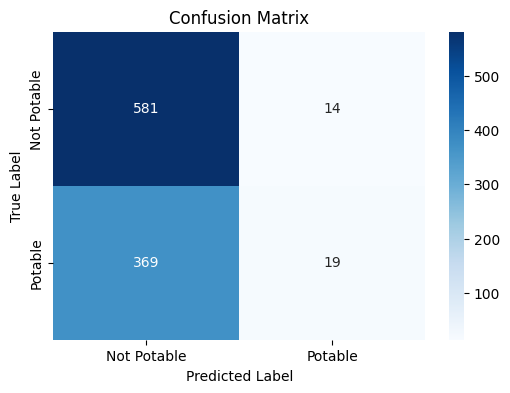

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

The heatmap visualizes the performance of the model by showing the counts of correct and incorrect predictions.

By analyzing the counts in each cell, we can assess the model's performance in terms of precision, recall, and accuracy for each class (Potable and Not Potable).


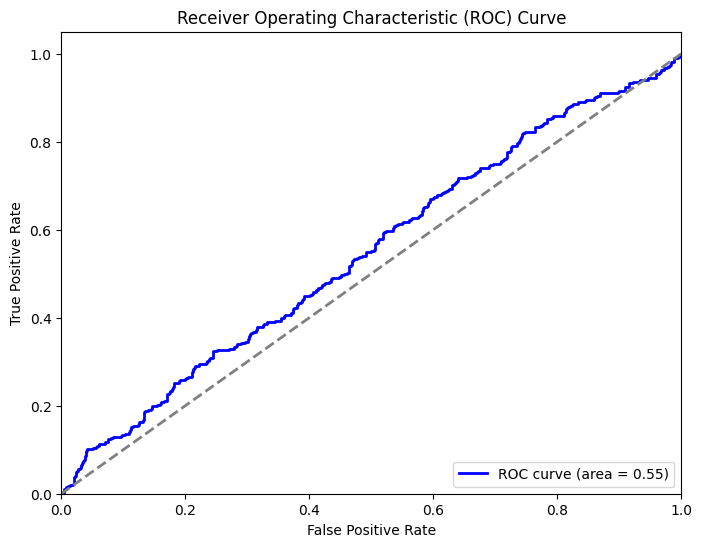

In [ ]:
y_pred_prob = model_LR.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The ROC curve visualizes the trade-off between the True Positive Rate and False Positive Rate at different threshold settings.

The AUC value (displayed in the legend) quantifies the overall performance of the model. An AUC of 0.5 indicates random guessing, while an AUC closer to 1 indicates better performance.

In this case, the AUC is 0.55, indicating that the model performs slightly better than random guessing.

<h1> Decision Tree Model </h1>

In [ ]:
model_DT = DecisionTreeClassifier(max_depth = 3)
model_DT

DecisionTreeClassifier(max_depth=3)

This code prepares a Decision Tree model for training. The parameters are set to control the training process and ensure reproducibility.
A shallow tree (depth = 3) is used to prevent overfitting while capturing key decision patterns.

In [ ]:
model_DT.fit(X_train,y_train)
model_DT

DecisionTreeClassifier(max_depth=3)

- Trains the Decision Tree using the training dataset (X_train, y_train).
- The model learns patterns to classify water as potable (1) or non-potable (0).

In [ ]:
y_predDT = model_DT.predict(X_test)

- Uses the trained Decision Tree to predict potability for unseen test data (X_test).
- The output y_predDT contains binary predictions (0 = not potable, 1 = potable).

In [ ]:
DT = accuracy_score(y_test, y_predDT)
accuracy.append(("Decision Tree",DT))
DT

0.62970498474059

- Compares y_predDT (predictions) with y_test (actual labels) to compute accuracy.
- Stores the accuracy score in a list accuracy.append(("Decision Tree",DT)) for later model comparison.

In [ ]:
print(classification_report(y_test,y_predDT))

              precision    recall  f1-score   support

           0       0.64      0.87      0.74       595
           1       0.57      0.27      0.36       388

    accuracy                           0.63       983
   macro avg       0.60      0.57      0.55       983
weighted avg       0.61      0.63      0.59       983



- Generates a classification report, showing precision, recall, and F1-score for each class.
- Provides an overview of how well the model performs.

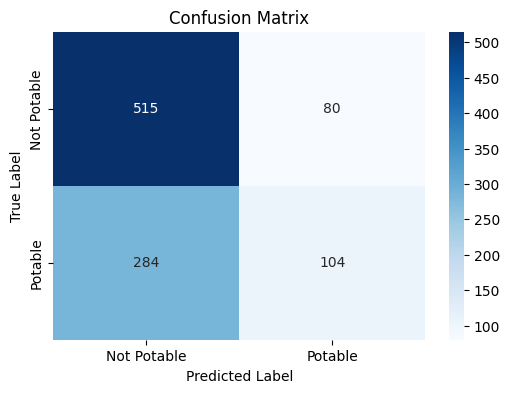

In [ ]:
cm = confusion_matrix(y_test, y_predDT)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

The heatmap visualizes the performance of the model by showing the counts of correct and incorrect predictions.

By analyzing the counts in each cell, we can assess the model's performance in terms of precision, recall, and accuracy for each class (Potable and Not Potable).

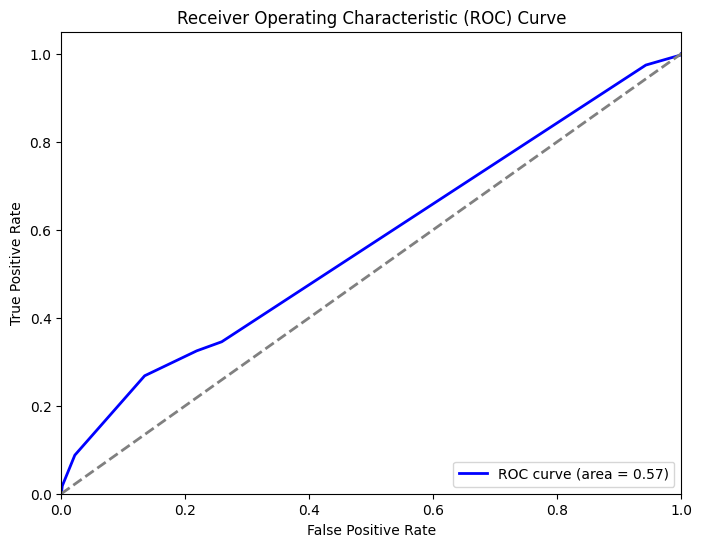

In [ ]:
y_pred_prob_DT = model_DT.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, y_pred_prob_DT)
roc_auc_DT = auc(fpr_DT, tpr_DT)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_DT, tpr_DT, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_DT:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

* The blue curve represents the model's performance.
* The dashed diagonal line represents a random classifier (AUC = 0.5).
* The Area Under the Curve (AUC) is 0.57, indicating poor predictive power.
* AUC of 0.57 is close to random guessing (0.5), suggesting that the model is weak in distinguishing potable from non-potable water.
An ideal classifier would have an AUC closer to 1.0, meaning better discrimination.
Improving the model with feature selection, data balancing, or advanced algorithms (Random Forest, XGBoost) may increase performance.

<h1> Random Forest Model </h1>

In [ ]:
model_RF = RandomForestClassifier()
model_RF

RandomForestClassifier()

This code prepares a Random Forest model for training. The parameters are set to control the training process and ensure reproducibility.

In [ ]:
model_RF.fit(X_train,y_train)
model_RF

RandomForestClassifier()

This code demonstrates the training of a Random Forest model and the display of its initialized parameters.

In [ ]:
y_predRF = model_RF.predict(X_test)


The y_pred variable now contains the model's predictions for the potability of the water samples in the test set.

In [ ]:
RF = accuracy_score(y_test, y_predRF)
accuracy.append(("Random Forest",RF))
RF

0.6632756866734486

The accuracy score (RF) represents the overall proportion of correctly predicted instances by the Random Forest model on the test data.

It provides a single metric to evaluate the model's performance.

In [ ]:
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76       595
           1       0.65      0.31      0.42       388

    accuracy                           0.66       983
   macro avg       0.66      0.60      0.59       983
weighted avg       0.66      0.66      0.63       983



This report evaluating the performance of a classification model, especially for imbalanced datasets.
By examining the precision, recall, and F1-score for each class, you can understand the model's strengths and weaknesses in predicting different classes.

The overall accuracy provides a general measure of the model's performance, while the macro and weighted averages provide more nuanced insights into the model's overall performance.

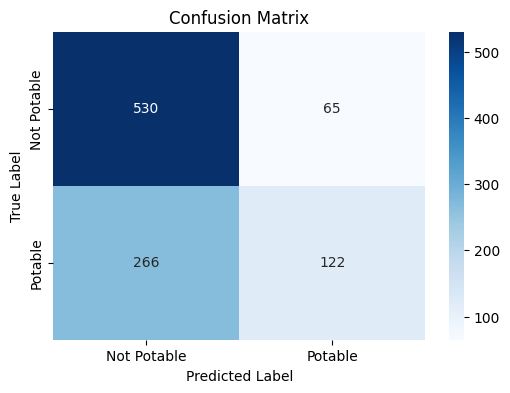

In [ ]:
cm = confusion_matrix(y_test, y_predRF)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Potable', 'Potable'], yticklabels=['Not Potable', 'Potable'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

The heatmap visualizes the performance of the model by showing the counts of correct and incorrect predictions.

By analyzing the counts in each cell, we can assess the model's performance in terms of precision, recall, and accuracy for each class (Potable and Not Potable).

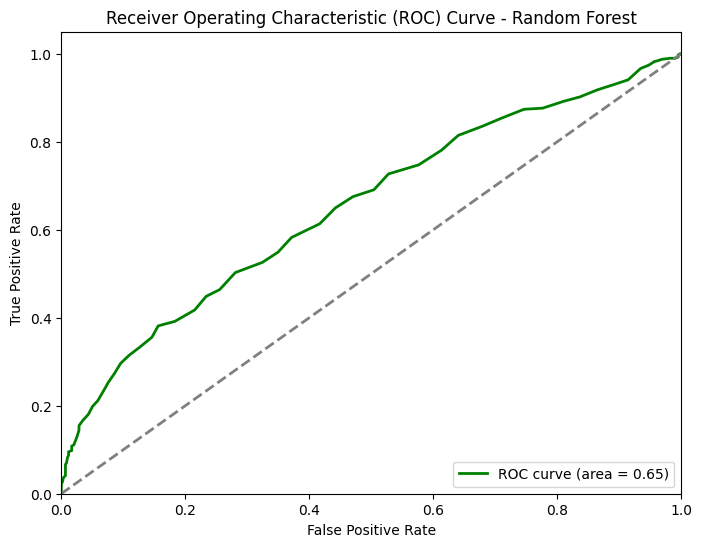

In [ ]:
y_pred_prob_RF = model_RF.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, y_pred_prob_RF)
roc_auc_RF = auc(fpr_RF, tpr_RF)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_RF, tpr_RF, color='green', lw=2, label=f'ROC curve (area = {roc_auc_RF:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

The Receiver Operating Characteristic (ROC) Curve visualizes the performance of the Random Forest classifier in distinguishing between potable and non-potable water. This curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different classification thresholds.


The ROC curve visualizes the trade-off between the True Positive Rate and False Positive Rate at different threshold settings.

The AUC value (displayed in the legend) quantifies the overall performance of the model. An AUC of 0.5 indicates random guessing, while an AUC closer to 1 indicates better performance.

In this case, the AUC is 0.65


<h1>Analysis</h1>

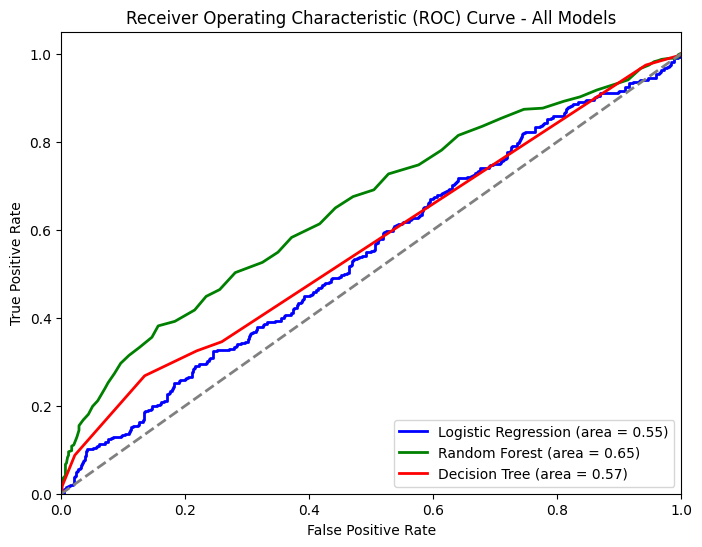

In [ ]:
plt.figure(figsize=(8, 6))

# Plot Logistic Regression ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (area = {roc_auc:.2f})')

# Plot Random Forest ROC curve
plt.plot(fpr_RF, tpr_RF, color='green', lw=2, label=f'Random Forest (area = {roc_auc_RF:.2f})')

# Plot Decision Tree ROC curve
plt.plot(fpr_DT, tpr_DT, color='red', lw=2, label=f'Decision Tree (area = {roc_auc_DT:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - All Models')
plt.legend(loc="lower right")
plt.show()

Random Forest (Green, AUC = 0.66)

This model performs the best among the three.
AUC of 0.66 suggests it has some predictive power, though not very strong.
The curve is consistently above the diagonal (random guess), meaning it can distinguish between classes better than chance.

Decision Tree (Red, AUC = 0.57)

Performs better than random but not significantly.
AUC of 0.57 suggests it provides some separation but is only slightly better than guessing.

Logistic Regression (Blue, AUC = 0.52)

Performs the worst, with an AUC close to 0.5 (random chance).
Indicates that the model struggles to differentiate between classes.
Diagonal Reference Line (Gray)

Represents a random classifier (AUC = 0.5).

The closer a model’s curve is to this line, the worse it performs.

In [ ]:
for i in accuracy:
  print(i)

('Logistic regression', 0.6103763987792472)
('Dicision Tree', 0.62970498474059)
('Random Forest', 0.6632756866734486)
